In [1]:
import numpy as np
import json
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
import statistics

# Load Data

In [2]:
# load the criteria
criteria_file_path = "../test/test_files/agenteval-in-out/math_problem_solving_criteria.json"
with open(criteria_file_path) as crit_file:
    criteria = json.load(crit_file)

criteria

{'accuracy': {'description': 'The correctness of the provided solution according to the math problem statement.',
  'accepted_values': ['Incorrect', 'Partially Correct', 'Correct']},
 'clarity': {'description': 'The ease of understanding the steps, explanations, and language used in the solution.',
  'accepted_values': ['Not Clear', 'Moderately Clear', 'Very Clear']},
 'efficiency': {'description': 'The use of optimal methods or approaches to solve the math problem.',
  'accepted_values': ['Inefficient', 'Moderately Efficient', 'Efficient']},
 'error_analysis': {'description': 'The identification and description of possible errors or misconceptions in the math problem-solving process.',
  'accepted_values': ['Not Addressed',
   'Partially Addressed',
   'Well Addressed']},
 'completeness': {'description': 'The presence of all necessary steps, explanations, and justifications in the provided solution.',
  'accepted_values': ['Incomplete', 'Mostly Complete', 'Complete']}}

In [3]:
# convert accepted value to score
level2score = {}
for criterion in criteria:
     score = 0
     for v in criteria[criterion]["accepted_values"]:
        level2score[v] = score
        score += 1
print(level2score)

{'Incorrect': 0, 'Partially Correct': 1, 'Correct': 2, 'Not Clear': 0, 'Moderately Clear': 1, 'Very Clear': 2, 'Inefficient': 0, 'Moderately Efficient': 1, 'Efficient': 2, 'Not Addressed': 0, 'Partially Addressed': 1, 'Well Addressed': 2, 'Incomplete': 0, 'Mostly Complete': 1, 'Complete': 2}


In [4]:
num_outputs = 120
num_seeds = 50

results = defaultdict(lambda: defaultdict(list)) # result[criterion][game] gives a list of 50 scores for that game 

for seed in range(num_seeds):
    # Load outcome data for the current seed
    with open(f'../test/test_files/agenteval-in-out/quantifier_robustness/evaluated_problems-{seed}', 'r') as file:
        outcome = json.load(file)

        for game in outcome:
            gameid = game.strip(".json")
            # some of these output are ill-formatted, so we have some if statements to do hardcoded data cleansing
            quantified_string_cleaned = outcome[game]['estimated_performance'].strip("```").lstrip("json").strip()
            quantified_result = json.loads(quantified_string_cleaned)
            for criterion in quantified_result:
                result_criterion = criterion.strip()
                if quantified_result[criterion] == "Partialy Correct" or quantified_result[criterion] == "Partial Correct":
                    results[result_criterion][gameid].append(level2score["Partially Correct"])
                elif quantified_result[criterion] == 'Mod_final_erately Clear':
                    results[result_criterion][gameid].append(level2score["Moderately Clear"])
                elif isinstance(quantified_result[criterion], dict):
                    if isinstance(quantified_result[criterion]['accepted_values'], list):
                        results[result_criterion][gameid].append(level2score[quantified_result[criterion]['accepted_values'][0]])
                    else:
                        results[result_criterion][gameid].append(level2score[quantified_result[criterion]['accepted_values']])
                else:
                    results[result_criterion][gameid].append(level2score[quantified_result[criterion]])

# Sample Variances

In [5]:
variances = defaultdict(lambda: defaultdict(int))

for criterion in results:
    for game in results[criterion]:
        variances[criterion][game] = statistics.variance(results[criterion][game])

In [6]:
variances

defaultdict(<function __main__.<lambda>()>,
            {'accuracy': defaultdict(int,
                         {'precalculus_0': 0.8526530612244898,
                          'precalculus_15': 0.4179591836734694,
                          'precalculus_8': 0.7248979591836735,
                          'precalculus_10': 0.10775510204081633,
                          'precalculus_1': 0.9942857142857143,
                          'precalculus_18': 0.09836734693877551,
                          'precalculus_7': 0.05755102040816327,
                          'precalculus_9': 0,
                          'precalculus_16': 0.8820408163265306,
                          'precalculus_12': 0.6187755102040816,
                          'precalculus_17': 0.3004081632653061,
                          'precalculus_2': 0.07510204081632653,
                          'precalculus_4': 0.5555102040816327,
                          'precalculus_6': 0,
                          'precalculus_3': 0.24530612244

# Present the Statistics

## print average sample variances for each criterion

In [7]:
variances_list = {}
for criterion in variances:
    variances_list[criterion] = []
    for game in variances[criterion]:
        variances_list[criterion].append(variances[criterion][game])

In [8]:
for criterion in variances_list:
    print(f"criterion {criterion}: {statistics.mean(variances_list[criterion])}")

criterion accuracy: 0.25324829931972787
criterion clarity: 0.1689795918367347
criterion efficiency: 0.27910884353741494
criterion error_analysis: 0.07368367346938776
criterion completeness: 0.29239455782312923


## plot sample variances for each criterion

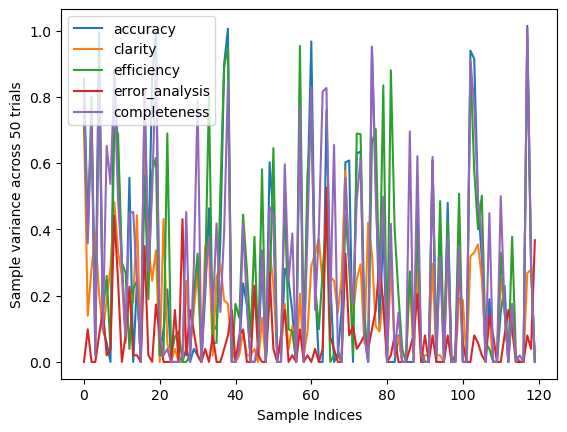

In [9]:
for criterion in variances_list:
    plt.plot(variances_list[criterion], label=criterion)
plt.ylabel("Sample variance across 50 trials")
plt.xlabel("Sample Indices")
plt.legend(loc="upper left")
plt.show()

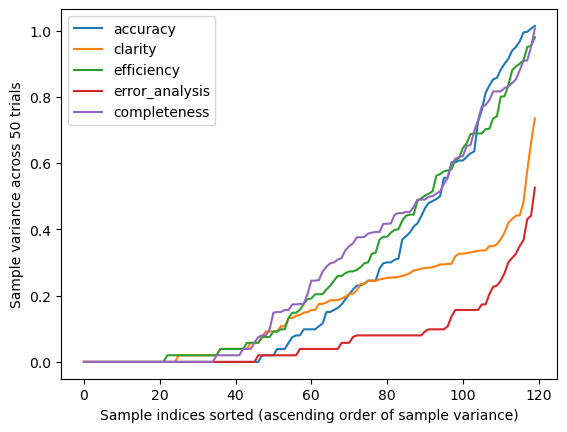

In [10]:
for criterion in variances_list:
    plt.plot(sorted(variances_list[criterion]), label=criterion)
plt.ylabel("Sample variance across 50 trials")
plt.xlabel("Sample indices sorted (ascending order of sample variance)")
plt.legend(loc="upper left")
plt.show()